# Heatmap Visualization

---

**Interpretability of MLP Layers in Vision Transformers**


**Created by:** Trung

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import torch
from timm import create_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

c:\Users\trung\anaconda3\envs\vit-cls\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initializing the pretrained model and the dataset.

In [2]:
from src.datasets.ImageNet import ImageNetDataset
from timm import create_model

device = 'cpu'

# Define your data path to the imagenet dataset here, please delete the current value
# and add the path value on your local machine.
DATA_PATH = "C:\\Users\\trung\\studium\\ws23_24\\deeplearning\\project\\projectcode"
# We are using a pretrained Vision Transformer base architecture with patch size 16x16.
TIMM_MODEL_DESCRIPTOR = 'vit_base_patch16_224'
HUGGINGFACE_MODEL_DESCRIPTOR = 'google/vit-base-patch16-224-in21k'

# Initialize the dataset and the pretrained model.
dataset = ImageNetDataset(DATA_PATH)
model = create_model(TIMM_MODEL_DESCRIPTOR, pretrained=True).to(device).eval()

In the IMAGENET dataset there are 1000 classes. For simplicity, we use normal index instead of imagenet_id to access the class.
We can plot all 50 images in a class with a class index.

Class name tench


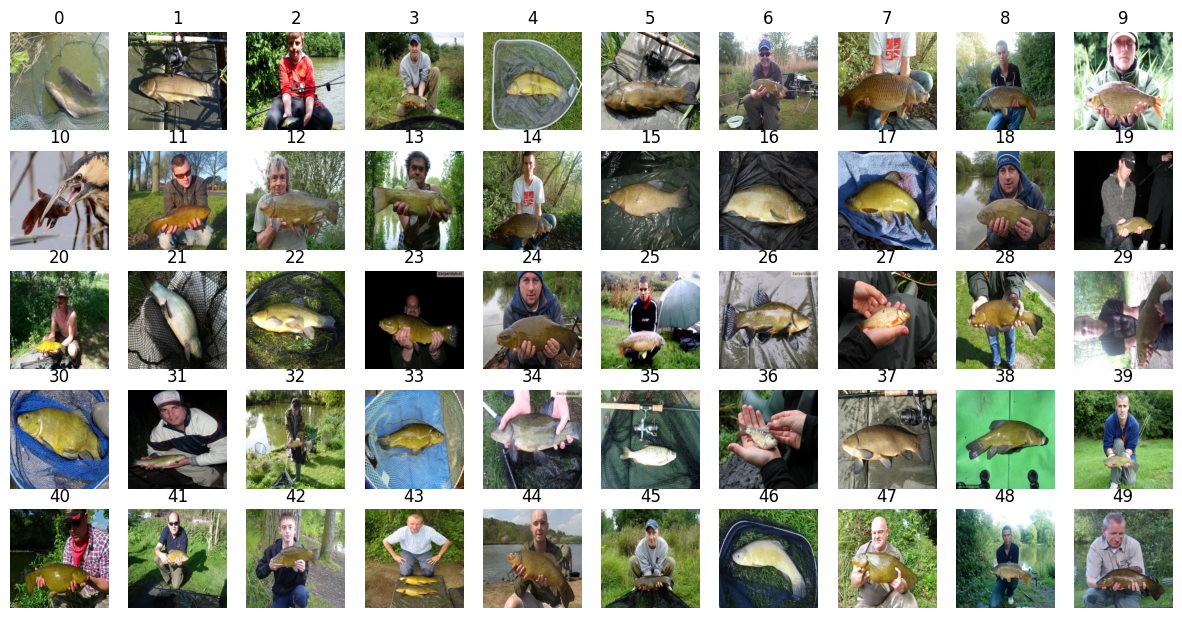

In [14]:
from src.utils.load_imgs import show_img_of_class

show_img_of_class(dataset, HUGGINGFACE_MODEL_DESCRIPTOR, class_idx=0)

We identify the top 5 key neurons of each class. Note that this will search in all 12 blocks.

In [17]:
from src.analyzers.top_stimulated_neurons import find_topk_stimulated_key_vectors

_, topk_indices = find_topk_stimulated_key_vectors(k=5, model=model)

# The top k indices has shape (5, 2, 1000), because for every top neuron we
# need 2 entries to fully identify its location: the block index and the vector index.
topk_indices.shape

torch.Size([5, 2, 1000])

Initialize the heatmap visualizer and plot heat map for the top 5 neurons of some classes. For each class we take a random image.

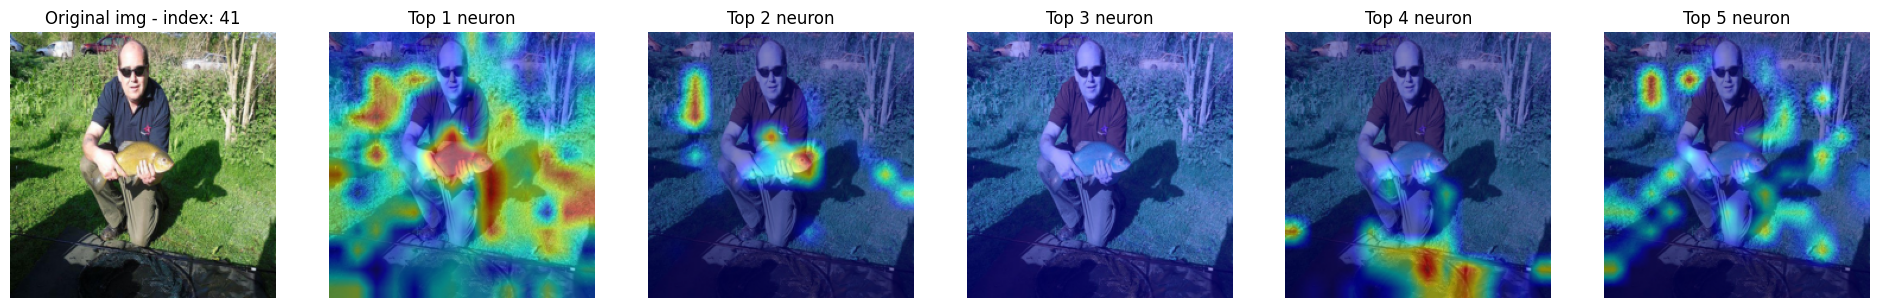

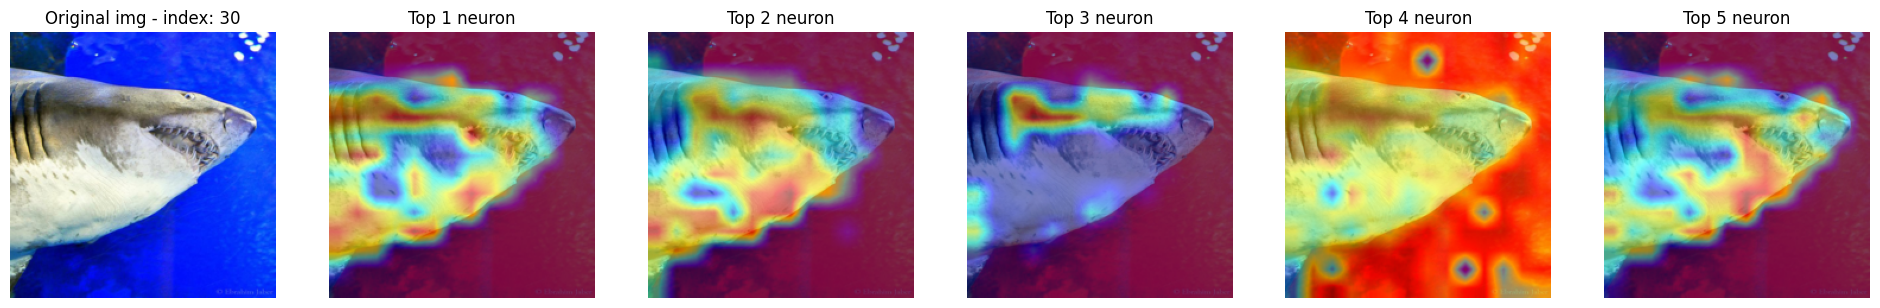

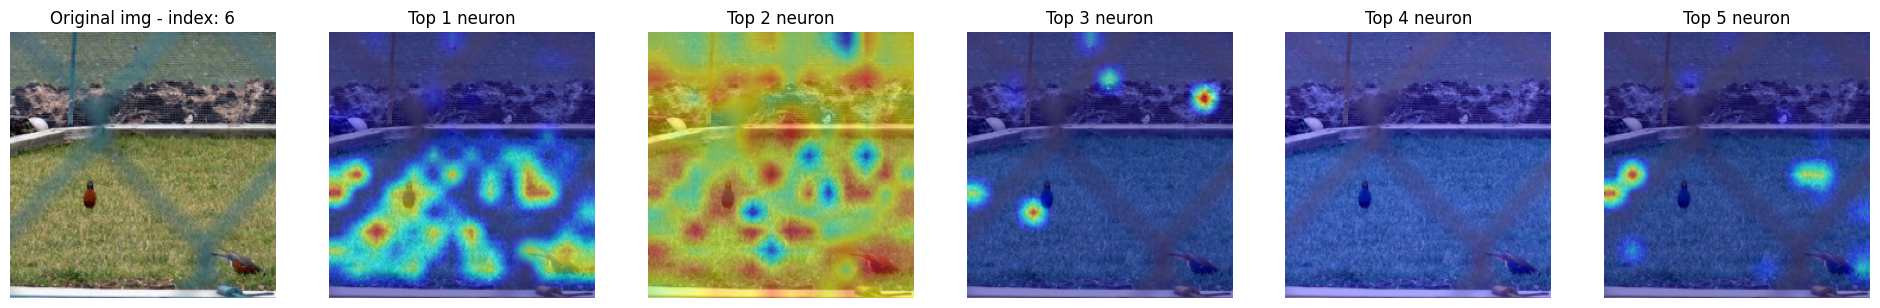

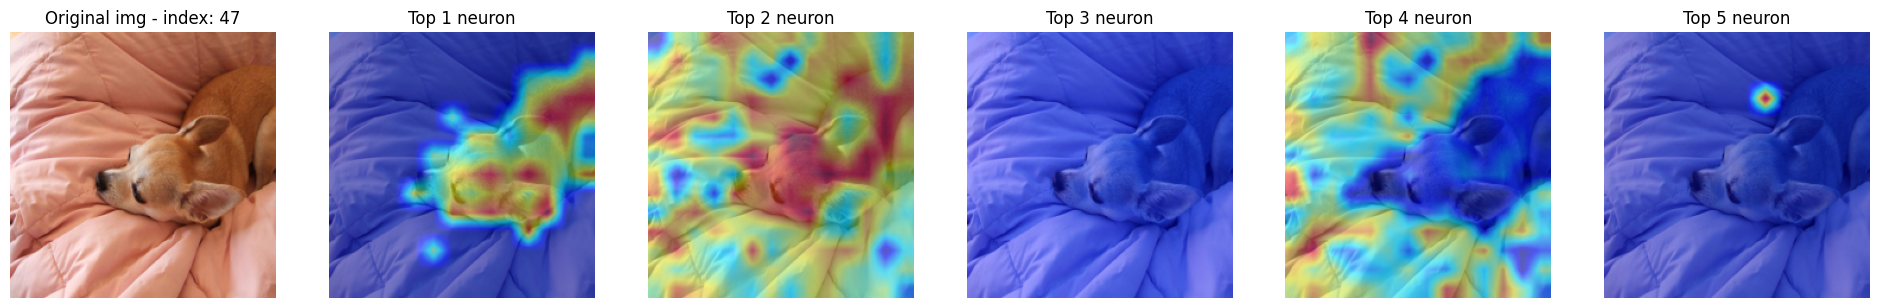

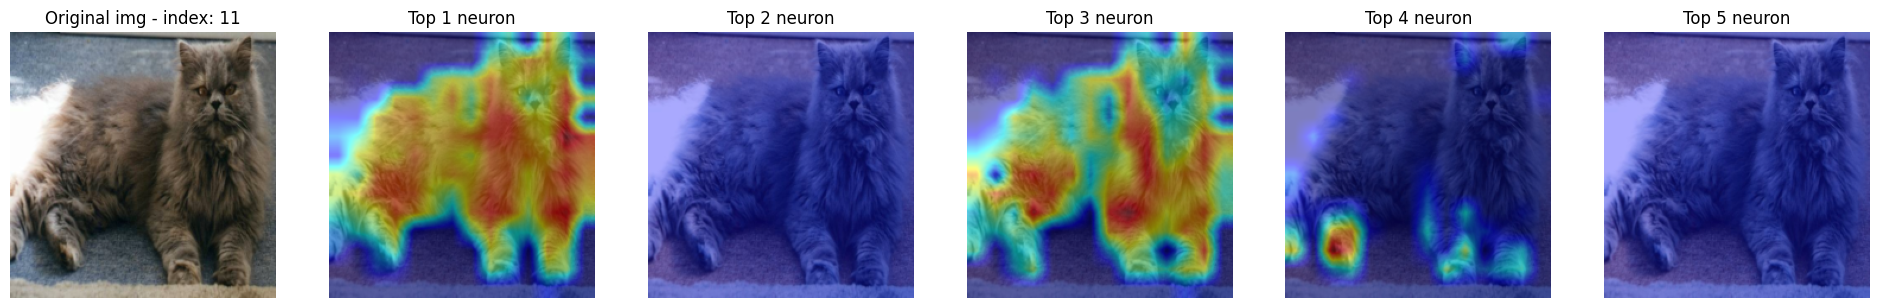

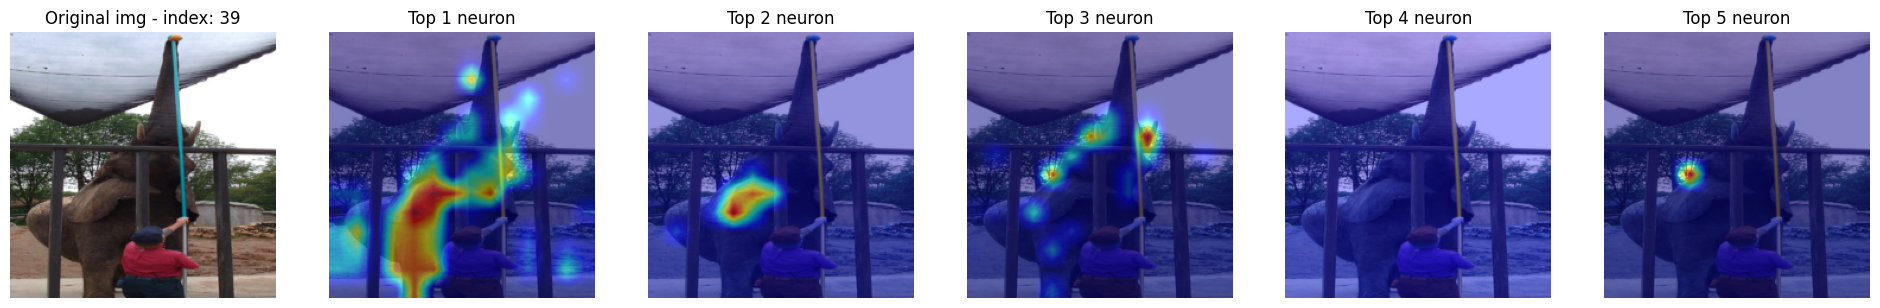

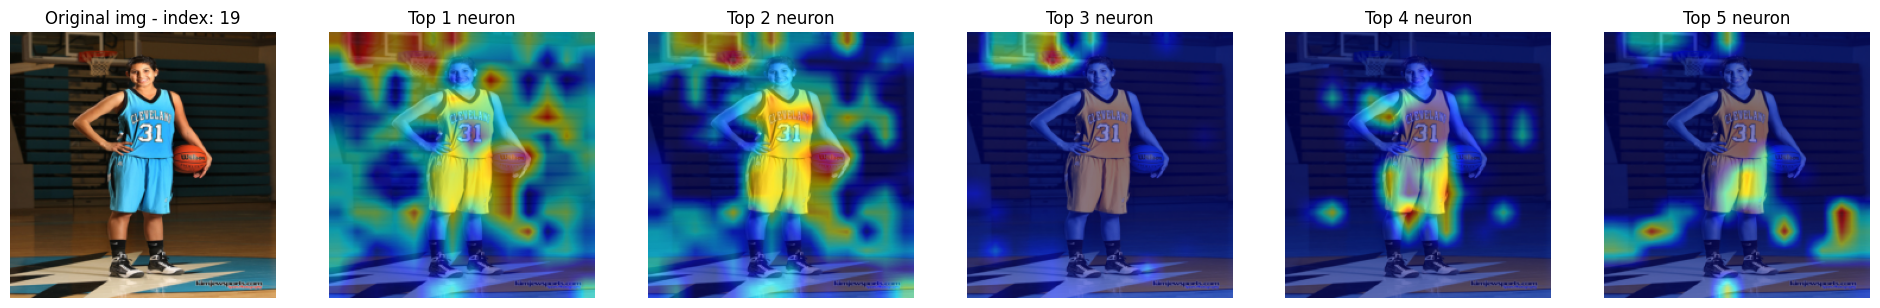

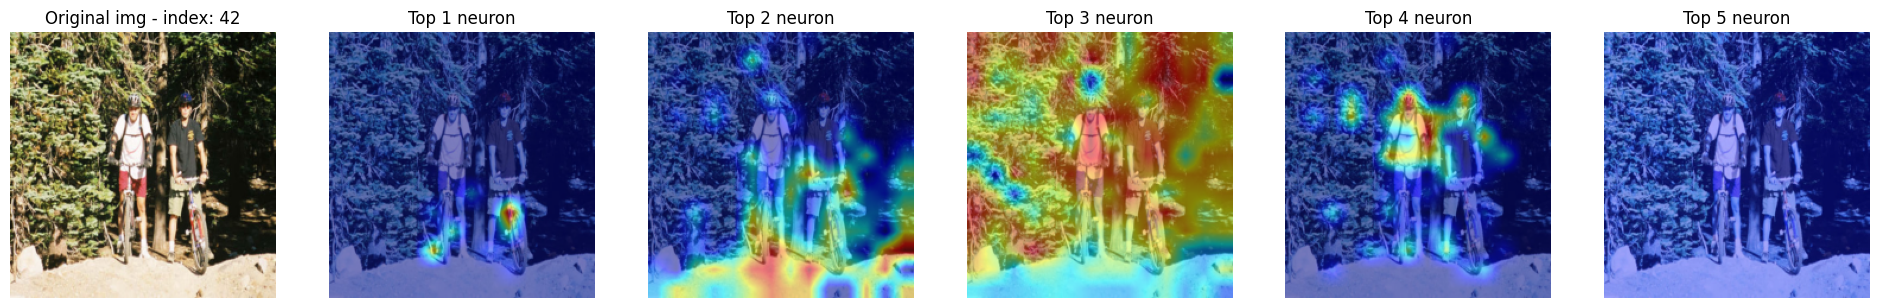

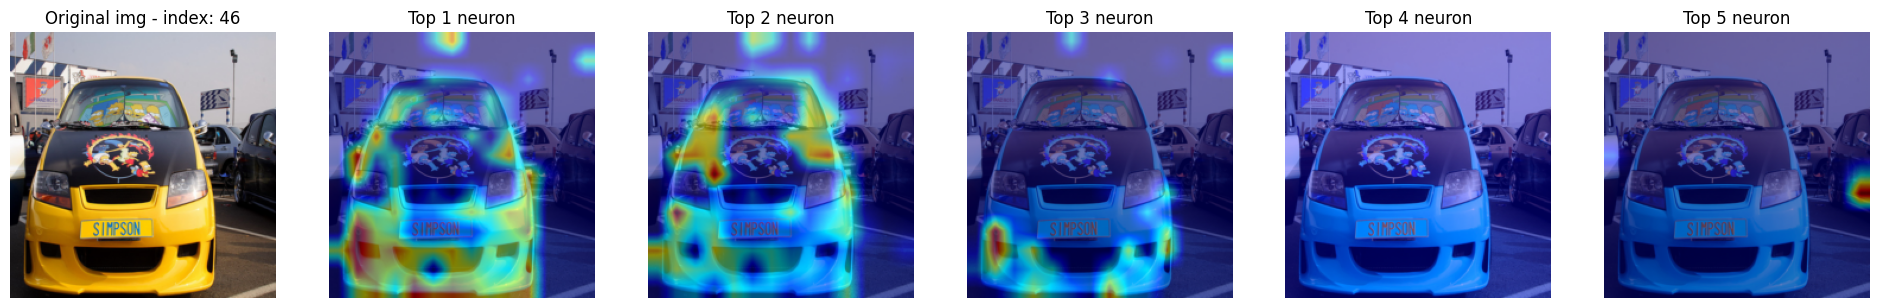

In [67]:
from src.visualizers.heatmap import HeatMap

fish_idx = 0
shark_idx = 2
bird_idx = 15
dog_idx = 151
cat_idx = 283
elephant_idx = 386
ball_idx = 430
bike_idx = 671
car_idx = 817

indices = [fish_idx, shark_idx, bird_idx, dog_idx, cat_idx, elephant_idx, ball_idx, bike_idx, car_idx]
heatmap = HeatMap(model, HUGGINGFACE_MODEL_DESCRIPTOR, dataset, topk_indices)

for class_idx in indices:
    heatmap.show(class_idx, k=5, img_indices=[np.random.randint(0, 50)])
